In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import binom

# About
Exploring a BMJ paper that claims surgeries have higher mortality on a surgeon's birthday.

Link: https://www.bmj.com/content/371/bmj.m4381

# Binomial Approach

Paper Conclusions:
* Birthday Mortality 6.9%, 95% confidence interval 5.7% to 8.1%
* Other Day Mortality 5.6%, 95% confidence interval 5.6% to 5.6%
* Difference 1.3%, 95% confidence interval 0.1% to 2.5%

Sample Sizes:
* Birthday: 2064
* Other days: 978812 

Set known values:

In [2]:
# Sample Sizes
birthday_n=2064
otherday_n=978812

In [3]:
# Probabilities
birthday_p=0.069
birthday_p_margin=0.012 # Half the confidence interval size

otherday_p=0.056
otherday_p_margin=0

# Analyse

Plot small sample distribution, assuming large sample mean is true.

In [4]:
p = otherday_p
n = birthday_n

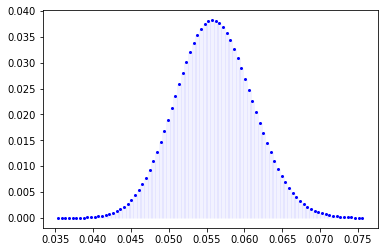

In [5]:
# Distribution of birthday_n sized sample
# Assuming otherday_p is true and iid
fig, ax = plt.subplots(1, 1)

sd = np.sqrt(n*p*(1-p))
sd_count_window=4

x = np.arange(int(n*p-sd*sd_count_window), int(n*p+sd*sd_count_window))
ax.plot(x/n, binom.pmf(x, n, p), 'bo', ms=2, label='binom pmf')
ax.vlines(x/n, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.05)

Lets suppose the true mortality is 5.6% for all days.

What's the chance of observing 6.9% in a sample sized 2,064?

In [6]:
# Probability of Exceeding the true mean 
exceedance_probability = 1 - binom.cdf(otherday_p*n,n,p)
exceedance_probability

0.497549232393399

In [7]:
# Probability of Exceeding the 6.9% 
exceedance_probability = 1 - binom.cdf(birthday_p*n,n,p)
exceedance_probability

0.006130514734890458

Conclusion:
* Less than 1% samples are as extreme as the birthday sample
* This suggests the result is no coincidence
* Assumptions:
    * iid binomial random variables
    * Non-birthday sample mean is the true mean
    
Caveats:
* I'm not sure whether something such as p-hacking or the curse of dimensionality would nullify the conclusion.

# Appendix
### Paper Abstract
```
Objective To determine whether patient mortality after surgery differs between surgeries performed on surgeons’ birthdays compared with other days of the year.

Design Retrospective observational study.

Setting US acute care and critical access hospitals.

Participants 100% fee-for-service Medicare beneficiaries aged 65 to 99 years who underwent one of 17 common emergency surgical procedures in 2011-14.

Main outcome measures Patient postoperative 30 day mortality, defined as death within 30 days after surgery, with adjustment for patient characteristics and surgeon fixed effects.

Results 980 876 procedures performed by 47 489 surgeons were analyzed. 2064 (0.2%) of the procedures were performed on surgeons’ birthdays. Patient characteristics, including severity of illness, were similar between patients who underwent surgery on a surgeon’s birthday and those who underwent surgery on other days. The overall unadjusted 30 day mortality on the operating surgeon’s birthday was 7.0% (145/2064) and that on other days was 5.6% (54 824/978 812). After adjusting for patient characteristics and surgeon fixed effects (effectively comparing outcomes of patients treated by the same surgeon on different days), patients who underwent surgery on a surgeon’s birthday exhibited higher mortality compared with patients who underwent surgery on other days (adjusted mortality rate, 6.9% v 5.6%; adjusted difference 1.3%, 95% confidence interval 0.1% to 2.5%; P=0.03). Event study analysis of patient mortality by day of surgery relative to a surgeon’s birthday found similar results.

Conclusions Among Medicare beneficiaries who underwent common emergency surgeries, those who received surgery on the surgeon’s birthday experienced higher mortality compared with patients who underwent surgery on other days. These findings suggest that surgeons might be distracted by life events that are not directly related to work.
```